In [27]:
import torch, torchvision
from torch import nn

In [28]:
class Mnet(nn.Module):
    def __init__(self):
        super(Mnet, self).__init__()
        self.linear1 = nn.Linear(28 * 28, 400)
        self.linear2 = nn.Linear(400, 200)
        self.linear3 = nn.Linear(200, 100)
        self.linear4 = nn.Linear(100, 50)
        self.linear5 = nn.Linear(50, 25)
        self.final_linear = nn.Linear(25, 10)

        self.relu = nn.ReLU()

    def forward(self, images):
        x = images.view(-1, 28 * 28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.relu(self.linear4(x))
        x = self.relu(self.linear5(x))
        x = self.final_linear(x)
        return x

In [29]:
model = torch.load("mnistmodel.pt")

In [30]:
T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
test_data = torchvision.datasets.MNIST("mnist_data", train=False, transform=T, download=True)

import matplotlib.pyplot as plt

#image, label = test_data[9016]
#print(label)
#plt.imshow(image[0])

In [31]:
#정답률

total_test = len(test_data)
correct_answer = 0

for i, (image, label) in enumerate(test_data):
    output = model(image)
    s = nn.Softmax(dim=1)
    output = s(output)
    a = torch.argmax(output)
    if label == a.item():
        correct_answer+=1
    else:
        print('wrong answer', i)

print(correct_answer, total_test)

wrong answer 149
wrong answer 151
wrong answer 247
wrong answer 259
wrong answer 268
wrong answer 340
wrong answer 445
wrong answer 495
wrong answer 582
wrong answer 684
wrong answer 720
wrong answer 844
wrong answer 938
wrong answer 947
wrong answer 1014
wrong answer 1039
wrong answer 1200
wrong answer 1226
wrong answer 1232
wrong answer 1242
wrong answer 1247
wrong answer 1260
wrong answer 1289
wrong answer 1319
wrong answer 1328
wrong answer 1393
wrong answer 1414
wrong answer 1425
wrong answer 1530
wrong answer 1553
wrong answer 1569
wrong answer 1681
wrong answer 1717
wrong answer 1751
wrong answer 1754
wrong answer 1790
wrong answer 1800
wrong answer 1850
wrong answer 1878
wrong answer 1880
wrong answer 1901
wrong answer 1952
wrong answer 2024
wrong answer 2109
wrong answer 2118
wrong answer 2130
wrong answer 2135
wrong answer 2224
wrong answer 2293
wrong answer 2369
wrong answer 2387
wrong answer 2406
wrong answer 2414
wrong answer 2422
wrong answer 2488
wrong answer 2582
wrong 

computer's guess: 3, answer: 3


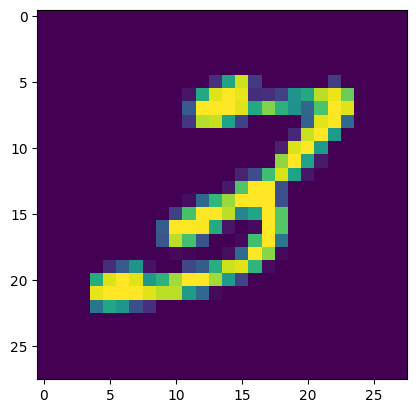

In [32]:
#틀린 1문제

def testexam(i: int):
    image, label = test_data[i]
    output = model(image)
    s = nn.Softmax(dim=1)
    output = s(output)
    a = torch.argmax(output)
    print(f"computer's guess: {a.item()}, answer: {label}")
    plt.imshow(image[0])


testexam(9975)